### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #For EDA purpose
%matplotlib inline   
import seaborn as sns  #EDA purpose
import warnings  #bypass Warning
warnings.filterwarnings('ignore')

from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

### LOAD DATA

In [2]:
df = pd.read_csv('Used_Car_data.csv')
df.head()

,Unnamed: 0,COMPANY,MODEL,BASIC,PRICE
0,0,2012 Maruti Swift,VDI Manual,"38,061 km\n1st Owner\nDiesel","₹2,92,299"
1,1,2014 Maruti Swift,VXI Manual,"1,07,206 km\n1st Owner\nPetrol","₹4,07,299"
2,2,2015 Maruti Swift,VDI ABS Manual,"44,638 km\n1st Owner\nDiesel","₹4,40,899"
3,3,2015 Maruti Swift,VDI ABS Manual,"89,196 km\n1st Owner\nDiesel","₹4,24,299"
4,4,2014 Maruti Ritz,VDI Manual,"43,382 km\n1st Owner\nDiesel","₹3,40,599"


In [3]:
split_data = df["COMPANY"].str.split(" ",2)
data = split_data.to_list()
names = ["year", "company","model"]
new_df = pd.DataFrame(data, columns=names)

In [4]:
new_df

,year,company,model
0,2012,Maruti,Swift
1,2014,Maruti,Swift
2,2015,Maruti,Swift
3,2015,Maruti,Swift
4,2014,Maruti,Ritz
...,...,...,...
5882,2014,Hyundai,Grand i10
5883,2017,Maruti,Swift
5884,2019,Mahindra,Scorpio
5885,2017,Hyundai,Creta


In [5]:
split_data = df["BASIC"].str.split("\n")
data = split_data.to_list()
names = ["km", "owner","fuel"]
my_df = pd.DataFrame(data, columns=names)

In [6]:
my_df

,km,owner,fuel
0,"38,061 km",1st Owner,Diesel
1,"1,07,206 km",1st Owner,Petrol
2,"44,638 km",1st Owner,Diesel
3,"89,196 km",1st Owner,Diesel
4,"43,382 km",1st Owner,Diesel
...,...,...,...
5882,"1,12,190 km",2nd Owner,Petrol
5883,"43,553 km",1st Owner,Petrol
5884,"18,656 km",1st Owner,Diesel
5885,"90,615 km",1st Owner,Diesel


In [7]:
split_data = df["MODEL"].str.rsplit(" ",1)
data = split_data.to_list()
names = ["variant","transmission"]
a_df = pd.DataFrame(data, columns=names)

In [8]:
a_df

,variant,transmission
0,VDI,Manual
1,VXI,Manual
2,VDI ABS,Manual
3,VDI ABS,Manual
4,VDI,Manual
...,...,...
5882,ASTA 1.2 KAPPA VTVT OPT,Manual
5883,LXI OPT,Manual
5884,S7 140 BHP 2WD,Manual
5885,1.4 E PLUS CRDI,Manual


In [9]:
result = pd.concat([df, my_df,a_df,new_df], axis=1)

In [10]:
result

,Unnamed: 0,COMPANY,MODEL,BASIC,PRICE,km,owner,fuel,variant,transmission,year,company,model
0,0,2012 Maruti Swift,VDI Manual,"38,061 km\n1st Owner\nDiesel","₹2,92,299","38,061 km",1st Owner,Diesel,VDI,Manual,2012,Maruti,Swift
1,1,2014 Maruti Swift,VXI Manual,"1,07,206 km\n1st Owner\nPetrol","₹4,07,299","1,07,206 km",1st Owner,Petrol,VXI,Manual,2014,Maruti,Swift
2,2,2015 Maruti Swift,VDI ABS Manual,"44,638 km\n1st Owner\nDiesel","₹4,40,899","44,638 km",1st Owner,Diesel,VDI ABS,Manual,2015,Maruti,Swift
3,3,2015 Maruti Swift,VDI ABS Manual,"89,196 km\n1st Owner\nDiesel","₹4,24,299","89,196 km",1st Owner,Diesel,VDI ABS,Manual,2015,Maruti,Swift
4,4,2014 Maruti Ritz,VDI Manual,"43,382 km\n1st Owner\nDiesel","₹3,40,599","43,382 km",1st Owner,Diesel,VDI,Manual,2014,Maruti,Ritz
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5882,5882,2014 Hyundai Grand i10,ASTA 1.2 KAPPA VTVT OPT Manual,"1,12,190 km\n2nd Owner\nPetrol","₹4,00,299","1,12,190 km",2nd Owner,Petrol,ASTA 1.2 KAPPA VTVT OPT,Manual,2014,Hyundai,Grand i10
5883,5883,2017 Maruti Swift,LXI OPT Manual,"43,553 km\n1st Owner\nPetrol","₹4,49,699","43,553 km",1st Owner,Petrol,LXI OPT,Manual,2017,Maruti,Swift
5884,5884,2019 Mahindra Scorpio,S7 140 BHP 2WD Manual,"18,656 km\n1st Owner\nDiesel","₹13,27,299","18,656 km",1st Owner,Diesel,S7 140 BHP 2WD,Manual,2019,Mahindra,Scorpio
5885,5885,2017 Hyundai Creta,1.4 E PLUS CRDI Manual,"90,615 km\n1st Owner\nDiesel","₹7,81,799","90,615 km",1st Owner,Diesel,1.4 E PLUS CRDI,Manual,2017,Hyundai,Creta


In [11]:
df = result.drop(['Unnamed: 0','COMPANY','MODEL','BASIC'], inplace = True, axis = 1)

In [12]:
result

,PRICE,km,owner,fuel,variant,transmission,year,company,model
0,"₹2,92,299","38,061 km",1st Owner,Diesel,VDI,Manual,2012,Maruti,Swift
1,"₹4,07,299","1,07,206 km",1st Owner,Petrol,VXI,Manual,2014,Maruti,Swift
2,"₹4,40,899","44,638 km",1st Owner,Diesel,VDI ABS,Manual,2015,Maruti,Swift
3,"₹4,24,299","89,196 km",1st Owner,Diesel,VDI ABS,Manual,2015,Maruti,Swift
4,"₹3,40,599","43,382 km",1st Owner,Diesel,VDI,Manual,2014,Maruti,Ritz
...,...,...,...,...,...,...,...,...,...
5882,"₹4,00,299","1,12,190 km",2nd Owner,Petrol,ASTA 1.2 KAPPA VTVT OPT,Manual,2014,Hyundai,Grand i10
5883,"₹4,49,699","43,553 km",1st Owner,Petrol,LXI OPT,Manual,2017,Maruti,Swift
5884,"₹13,27,299","18,656 km",1st Owner,Diesel,S7 140 BHP 2WD,Manual,2019,Mahindra,Scorpio
5885,"₹7,81,799","90,615 km",1st Owner,Diesel,1.4 E PLUS CRDI,Manual,2017,Hyundai,Creta


In [13]:
df = result[["company", "model", "variant","transmission",'km',"fuel",'owner','year','PRICE']]

In [14]:
df

,company,model,variant,transmission,km,fuel,owner,year,PRICE
0,Maruti,Swift,VDI,Manual,"38,061 km",Diesel,1st Owner,2012,"₹2,92,299"
1,Maruti,Swift,VXI,Manual,"1,07,206 km",Petrol,1st Owner,2014,"₹4,07,299"
2,Maruti,Swift,VDI ABS,Manual,"44,638 km",Diesel,1st Owner,2015,"₹4,40,899"
3,Maruti,Swift,VDI ABS,Manual,"89,196 km",Diesel,1st Owner,2015,"₹4,24,299"
4,Maruti,Ritz,VDI,Manual,"43,382 km",Diesel,1st Owner,2014,"₹3,40,599"
...,...,...,...,...,...,...,...,...,...
5882,Hyundai,Grand i10,ASTA 1.2 KAPPA VTVT OPT,Manual,"1,12,190 km",Petrol,2nd Owner,2014,"₹4,00,299"
5883,Maruti,Swift,LXI OPT,Manual,"43,553 km",Petrol,1st Owner,2017,"₹4,49,699"
5884,Mahindra,Scorpio,S7 140 BHP 2WD,Manual,"18,656 km",Diesel,1st Owner,2019,"₹13,27,299"
5885,Hyundai,Creta,1.4 E PLUS CRDI,Manual,"90,615 km",Diesel,1st Owner,2017,"₹7,81,799"


In [15]:
df['PRICE'] = df['PRICE'].str.replace(',', '')
df['PRICE'] = df['PRICE'].str.replace('₹', '')
df['PRICE'] = df['PRICE'].astype(int)

df['km'] = df['km'].str.replace(',', '')
df['km'] = df['km'].str.replace('km', '')
df['km'] = df['km'].astype(int)


In [16]:
df['owner'].unique()

array(['1st Owner', '2nd Owner', '3rd Owner', '4th Owner', '5th Owner'],
      dtype=object)

In [17]:
df['owner'] = df['owner'].replace(['1st Owner','2nd Owner','3rd Owner','4th Owner','5th Owner'],[1,2,3,4,5])

In [18]:
print("unique value in company is ", df['company'].nunique())
print("unique value in model is ", df['model'].nunique())
print("unique value in variant is ", df['variant'].nunique())
print("unique value in transmission is ", df['transmission'].nunique())
print("unique value in fuel is ", df['fuel'].nunique())
print("unique value in owner is ", df['owner'].nunique())
print("unique value in year is ", df['year'].nunique())

unique value in company is  21
unique value in model is  115
unique value in variant is  570
unique value in transmission is  25
unique value in fuel is  4
unique value in owner is  5
unique value in year is  14


In [19]:
df.shape

(5887, 9)

In [20]:
df.isnull().sum()

company         0
model           0
variant         0
transmission    3
km              0
fuel            0
owner           0
year            0
PRICE           0
dtype: int64

### NULL VALUES REMOVAL

In [21]:
df[df.isnull().any(axis=1)]

,company,model,variant,transmission,km,fuel,owner,year,PRICE
1615,Mahindra,XUV 3OO,W8(O),None,15768,Diesel,1,2020,1268099
4927,Maruti,S PRESSO,VXI,None,8446,Petrol,1,2020,472499
5146,Maruti,OMNI E,STD,None,18747,Petrol,3,2017,360299


In [22]:
df[df['model'].str.contains('XUV 3OO')]


,company,model,variant,transmission,km,fuel,owner,year,PRICE
680,Mahindra,XUV 3OO,W4 PETROL,Manual,6573,Petrol,1,2020,798699
1615,Mahindra,XUV 3OO,W8(O),None,15768,Diesel,1,2020,1268099
1807,Mahindra,XUV 3OO,W8 (O) DIESEL AT,Automatic,24671,Diesel,1,2020,1431799
4379,Mahindra,XUV 3OO,W4 PETROL,Manual,6573,Petrol,1,2020,798699
5694,Mahindra,XUV 3OO,W4 PETROL,Manual,6573,Petrol,1,2020,798699


In [23]:
df[df['model'].str.contains('OMNI E')]

,company,model,variant,transmission,km,fuel,owner,year,PRICE
1677,Maruti,OMNI E,8 STR,Manual,25265,Petrol,1,2018,355499
1895,Maruti,OMNI E,8 STR,Manual,20442,Petrol,1,2017,368999
3217,Maruti,OMNI E,STD,Manual,220,Petrol,1,2015,239899
4902,Maruti,OMNI E,8 STR,Manual,27387,Petrol,1,2017,328299
5042,Maruti,OMNI E,STD,Manual,3768,Petrol,1,2019,410599
5146,Maruti,OMNI E,STD,None,18747,Petrol,3,2017,360299
5201,Maruti,OMNI E,STD,Manual,69383,Petrol,1,2017,315799


In [24]:
df= df.drop(labels=[1615], axis=0)

In [25]:
df

,company,model,variant,transmission,km,fuel,owner,year,PRICE
0,Maruti,Swift,VDI,Manual,38061,Diesel,1,2012,292299
1,Maruti,Swift,VXI,Manual,107206,Petrol,1,2014,407299
2,Maruti,Swift,VDI ABS,Manual,44638,Diesel,1,2015,440899
3,Maruti,Swift,VDI ABS,Manual,89196,Diesel,1,2015,424299
4,Maruti,Ritz,VDI,Manual,43382,Diesel,1,2014,340599
...,...,...,...,...,...,...,...,...,...
5882,Hyundai,Grand i10,ASTA 1.2 KAPPA VTVT OPT,Manual,112190,Petrol,2,2014,400299
5883,Maruti,Swift,LXI OPT,Manual,43553,Petrol,1,2017,449699
5884,Mahindra,Scorpio,S7 140 BHP 2WD,Manual,18656,Diesel,1,2019,1327299
5885,Hyundai,Creta,1.4 E PLUS CRDI,Manual,90615,Diesel,1,2017,781799


In [26]:
df.fillna(value = 'Manual',
          inplace = True)

In [27]:
df.isnull().sum()

company         0
model           0
variant         0
transmission    0
km              0
fuel            0
owner           0
year            0
PRICE           0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5886 entries, 0 to 5886
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company       5886 non-null   object
 1   model         5886 non-null   object
 2   variant       5886 non-null   object
 3   transmission  5886 non-null   object
 4   km            5886 non-null   int32 
 5   fuel          5886 non-null   object
 6   owner         5886 non-null   int64 
 7   year          5886 non-null   object
 8   PRICE         5886 non-null   int32 
dtypes: int32(2), int64(1), object(6)
memory usage: 413.9+ KB


In [29]:
df['year'].unique()

array(['2012', '2014', '2015', '2013', '2019', '2016', '2017', '2018',
       '2020', '2009', '2021', '2011', '2010', '2008'], dtype=object)

In [30]:
df['owner'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [31]:
df["year"] = df["year"].astype(str).astype(int)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5886 entries, 0 to 5886
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company       5886 non-null   object
 1   model         5886 non-null   object
 2   variant       5886 non-null   object
 3   transmission  5886 non-null   object
 4   km            5886 non-null   int32 
 5   fuel          5886 non-null   object
 6   owner         5886 non-null   int64 
 7   year          5886 non-null   int32 
 8   PRICE         5886 non-null   int32 
dtypes: int32(3), int64(1), object(5)
memory usage: 390.9+ KB


In [33]:
df

,company,model,variant,transmission,km,fuel,owner,year,PRICE
0,Maruti,Swift,VDI,Manual,38061,Diesel,1,2012,292299
1,Maruti,Swift,VXI,Manual,107206,Petrol,1,2014,407299
2,Maruti,Swift,VDI ABS,Manual,44638,Diesel,1,2015,440899
3,Maruti,Swift,VDI ABS,Manual,89196,Diesel,1,2015,424299
4,Maruti,Ritz,VDI,Manual,43382,Diesel,1,2014,340599
...,...,...,...,...,...,...,...,...,...
5882,Hyundai,Grand i10,ASTA 1.2 KAPPA VTVT OPT,Manual,112190,Petrol,2,2014,400299
5883,Maruti,Swift,LXI OPT,Manual,43553,Petrol,1,2017,449699
5884,Mahindra,Scorpio,S7 140 BHP 2WD,Manual,18656,Diesel,1,2019,1327299
5885,Hyundai,Creta,1.4 E PLUS CRDI,Manual,90615,Diesel,1,2017,781799


In [34]:
df.describe()

,km,owner,year,PRICE
count,5886.000000,5886.000000,5886.000000,5.886000e+03
mean,45531.137445,1.201325,2016.311927,6.080910e+05
std,33924.441446,0.449001,2.265897,3.008099e+05
min,58.000000,1.000000,2008.000000,1.682990e+05
25%,21243.750000,1.000000,2015.000000,4.108990e+05
50%,38130.500000,1.000000,2017.000000,5.310990e+05
75%,61569.750000,1.000000,2018.000000,7.163990e+05
max,353288.000000,5.000000,2021.000000,3.388499e+06


## EDA

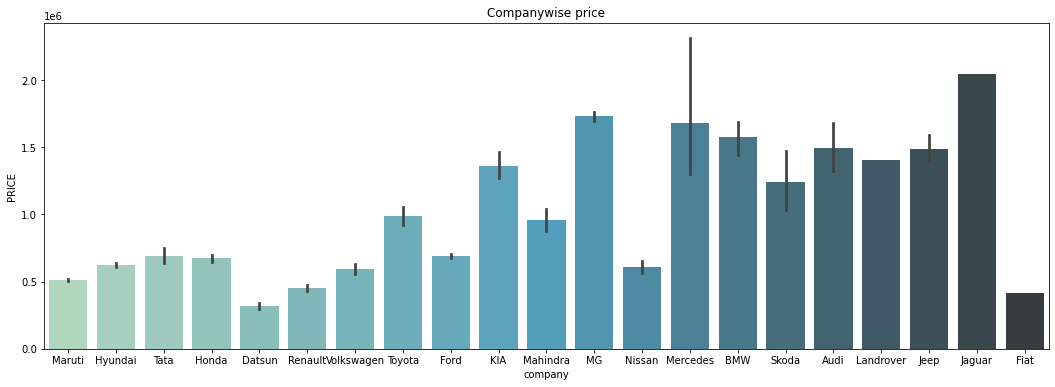

In [35]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'company', y = 'PRICE', data = df, palette= 'GnBu_d').set_title('Companywise price')
plt.xticks
plt.show()

CONCLUSION :
    
    As we can visulise that from above graph, there are higher average price of some luxuries car like jaguar, mercedes, MG, BMW.
    
    Fiat, datsun and maruti have low average price.

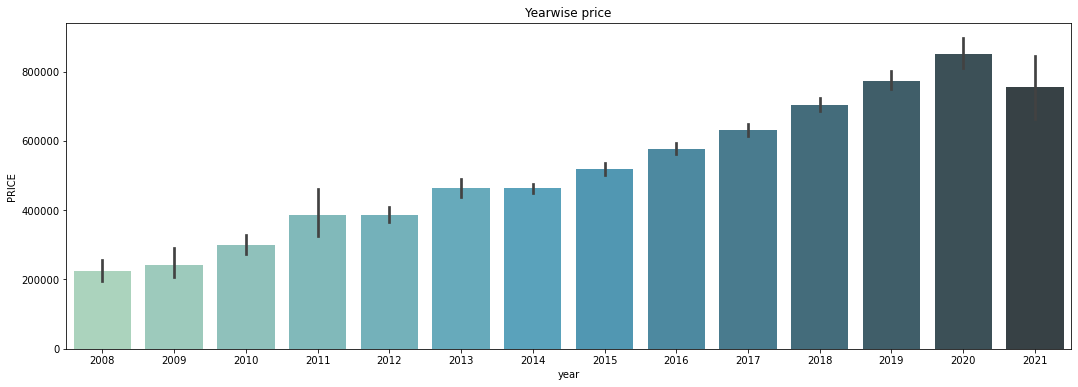

In [36]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'year', y = 'PRICE', data = df, palette= 'GnBu_d').set_title('Yearwise price')
plt.xticks
plt.show()

Conclusion:
    
    As no of year increase, price is going to decrease. it means old have have low selling price compare to low old car. it is a one factor that we can consider important.

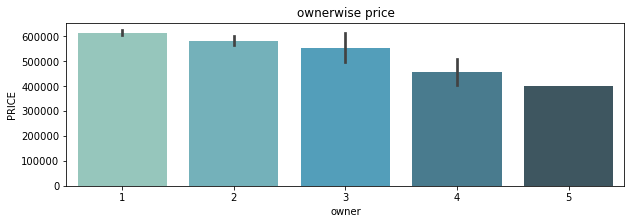

In [37]:
plt.figure(figsize = (10,3))
sns.barplot(x = 'owner', y = 'PRICE', data = df, palette= 'GnBu_d').set_title('ownerwise price')
plt.xticks
plt.show()

Conclusion:
    
    If car is of 1st owner than it get higher value in reselling while as no of owener increases, price of car are going to decrease.

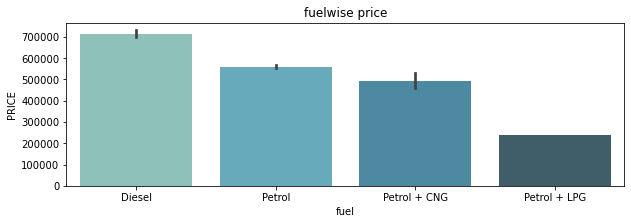

In [38]:
plt.figure(figsize = (10,3))
sns.barplot(x = 'fuel', y = 'PRICE', data = df, palette= 'GnBu_d').set_title('fuelwise price')
plt.xticks
plt.show()

Conclusion:
    
    Must important factor that is fuel, If car have diesel option as a fuel then it is in high demand and get high value than petrol option have also good average price.

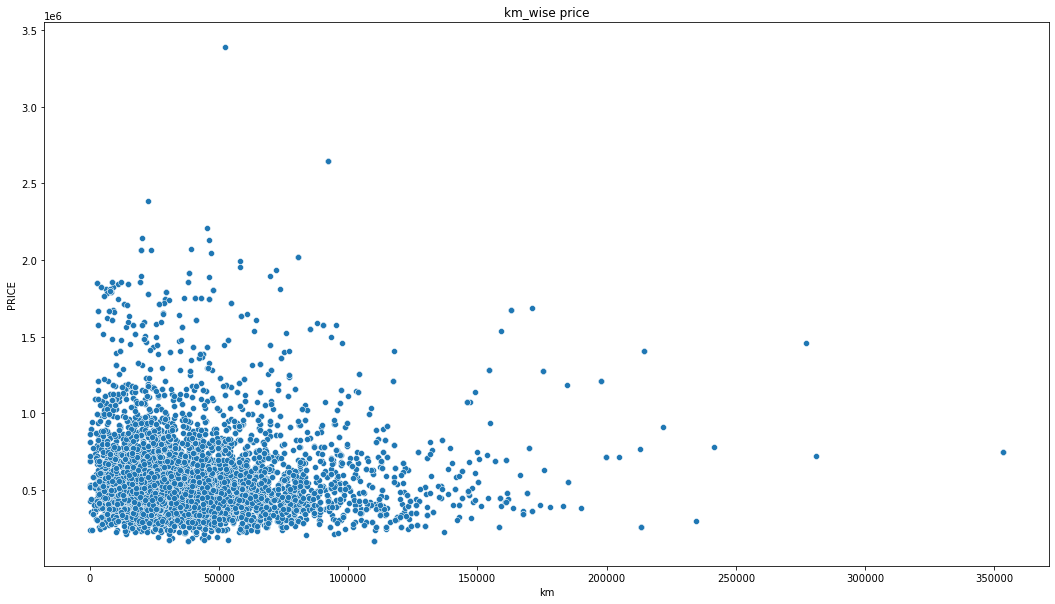

In [39]:
plt.figure(figsize = (18,10))
sns.scatterplot(data=df, x="km", y="PRICE").set_title('km_wise price')
plt.xticks
plt.show()

Conclusion:
    
    From above graph, we can mark that price is decrease as km increase. it is general we can mark that, may plot we can also visulise that from above graph where km are high but price is also high, in this case other factors may be metter.

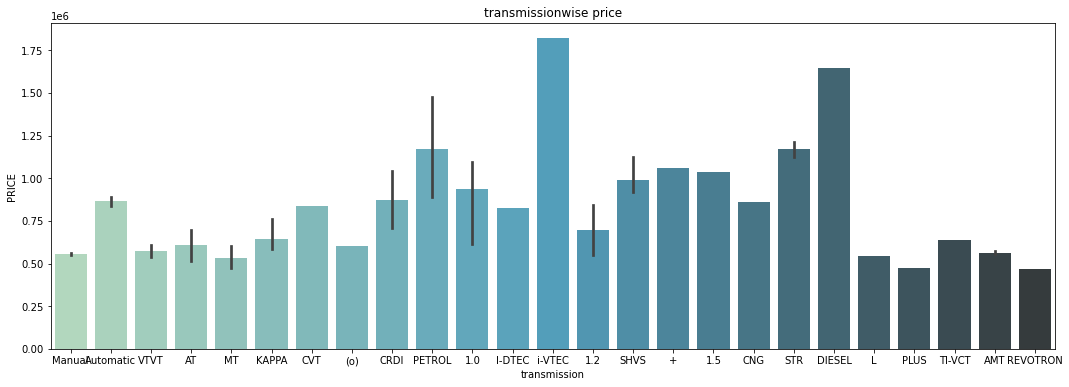

In [40]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'transmission', y = 'PRICE', data = df, palette= 'GnBu_d').set_title('transmissionwise price')
plt.xticks
plt.show()

Conclusion:

    Compare to others, I-VTEC, DIESEL,PETROL and STR transmission car are highly demandable and also in higher price

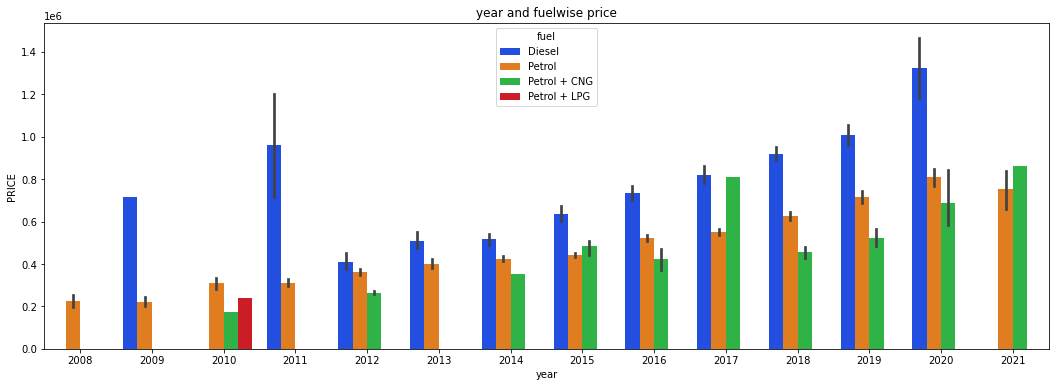

In [41]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'year', y = 'PRICE', data = df, palette= 'bright',hue= 'fuel',).set_title('year and fuelwise price')
plt.xticks
plt.show()

Conclusion:
    
    1) Petrol+LPG Cars are not in market as much, as per our data, we have this type of car available in 2010 only.
    2) Diesel car's price are increase as car manufacturing is decreasing, diesel car was in high demand in 2009-2011
    3) Petrol car's price is increasing as model is new, we can visulise that it have stable increasing ratio.
    4) Petrol+CNG variant are in high demand, last year, while diesel car was not as much as.
    5) Petrol CNG variant have sudden high in 2017

<Figure size 576x576 with 0 Axes>

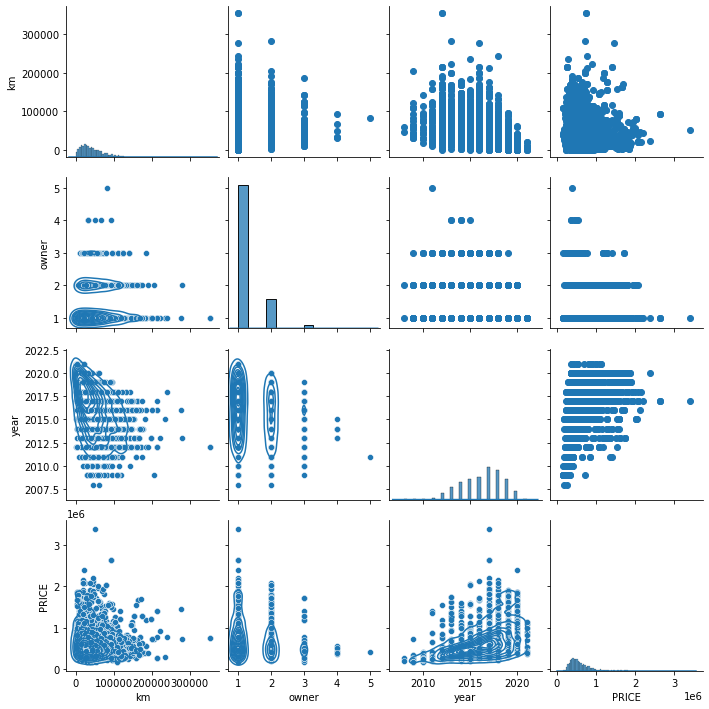

In [42]:
fig1 = plt.figure(figsize=(8,8))
fig1 = sns.pairplot(data=df)
fig1.map_upper(plt.scatter)
fig1.map_diag(sns.distplot)
fig1.map_lower(sns.kdeplot)

Conclusion:

    1) As km increase, price is decreasing.
    2) No of owner increases, prices is decreases.
    3) As year increase, price is also increase
    4) As year increase than no of owner also increase.
   

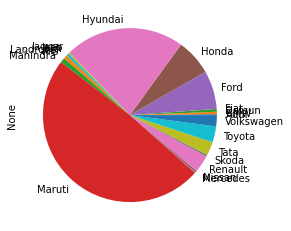

In [43]:
df.groupby('company').size().plot(kind='pie')

Conclusion:
    
    Nearly 50% of data of past few years, we have Maruti company cars are high in resell.
    Hyundai and Honda have also some parts covering in reselling

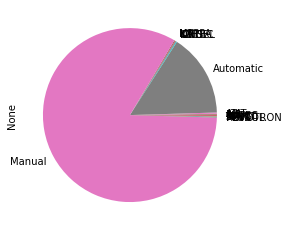

In [44]:
df.groupby('transmission').size().plot(kind='pie')

Conclusion:
    
    80% data have Manual transmission ans 17-18% data have Automatic transmission, rest are neglegible

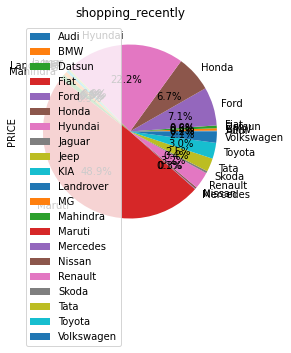

In [45]:
df.groupby(['company']).count().plot(kind='pie',y = 'PRICE',autopct ='%1.1f%%',title = ('shopping_recently'),)

In [46]:
df

,company,model,variant,transmission,km,fuel,owner,year,PRICE
0,Maruti,Swift,VDI,Manual,38061,Diesel,1,2012,292299
1,Maruti,Swift,VXI,Manual,107206,Petrol,1,2014,407299
2,Maruti,Swift,VDI ABS,Manual,44638,Diesel,1,2015,440899
3,Maruti,Swift,VDI ABS,Manual,89196,Diesel,1,2015,424299
4,Maruti,Ritz,VDI,Manual,43382,Diesel,1,2014,340599
...,...,...,...,...,...,...,...,...,...
5882,Hyundai,Grand i10,ASTA 1.2 KAPPA VTVT OPT,Manual,112190,Petrol,2,2014,400299
5883,Maruti,Swift,LXI OPT,Manual,43553,Petrol,1,2017,449699
5884,Mahindra,Scorpio,S7 140 BHP 2WD,Manual,18656,Diesel,1,2019,1327299
5885,Hyundai,Creta,1.4 E PLUS CRDI,Manual,90615,Diesel,1,2017,781799


In [47]:
df.drop(['variant'], inplace = True, axis = 1)

# as we marked that variant have high no of models and it didn't as much effective so we will drop it.

In [48]:
df

,company,model,transmission,km,fuel,owner,year,PRICE
0,Maruti,Swift,Manual,38061,Diesel,1,2012,292299
1,Maruti,Swift,Manual,107206,Petrol,1,2014,407299
2,Maruti,Swift,Manual,44638,Diesel,1,2015,440899
3,Maruti,Swift,Manual,89196,Diesel,1,2015,424299
4,Maruti,Ritz,Manual,43382,Diesel,1,2014,340599
...,...,...,...,...,...,...,...,...
5882,Hyundai,Grand i10,Manual,112190,Petrol,2,2014,400299
5883,Maruti,Swift,Manual,43553,Petrol,1,2017,449699
5884,Mahindra,Scorpio,Manual,18656,Diesel,1,2019,1327299
5885,Hyundai,Creta,Manual,90615,Diesel,1,2017,781799


In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["company"]= le.fit_transform(df["company"])
df["model"]= le.fit_transform(df["model"])
df["transmission"]= le.fit_transform(df["transmission"])
df["fuel"]= le.fit_transform(df["fuel"])

In [50]:
df.dtypes

company         int32
model           int32
transmission    int32
km              int32
fuel            int32
owner           int64
year            int32
PRICE           int32
dtype: object

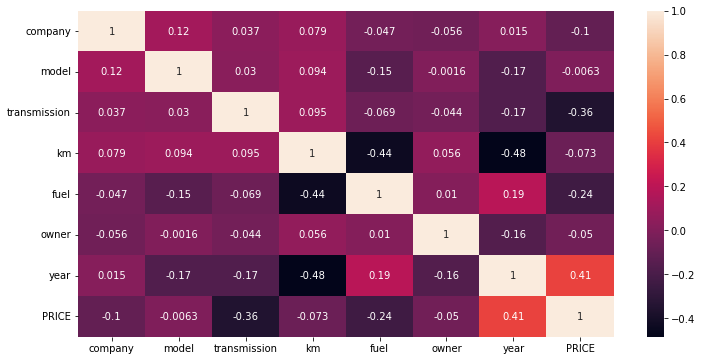

In [51]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot = True,linecolor="black")

### OUTLIER REMOVAL:

In [52]:
from scipy.stats import zscore

#di=df.columns
z_score=zscore(df)
print(df.shape)
df_1=df.loc[(z_score<3).all(axis=1)]
print(df_1.shape)

#We had 250 near ourliers, which we removed using Z-score technique

(5886, 8)
(5564, 8)


### SKEWNESS REMOVAL:

In [53]:
df_1.skew()

company        -0.088915
model           0.208749
transmission   -1.972578
km              0.945660
fuel           -0.568306
owner           1.772654
year           -0.444863
PRICE           1.102665
dtype: float64

In [54]:
from scipy.stats import boxcox

for col in df_1:
    if df_1[col].skew()>=1.6:
        df_1[col]=np.cbrt(df_1[col]) 
    if df_1[col].skew()<= -1.8:
        df_1[col]=np.power(df_1[col],2)


In [55]:
df_1.skew()

company        -0.088915
model           0.208749
transmission   -1.810640
km              0.945660
fuel           -0.568306
owner           1.772654
year           -0.444863
PRICE           1.102665
dtype: float64

OUR DATA LOOKS READY FOR FURTHER PROCESSING, NOW WE WILL SPLIT TARGET VARIABLE AND PROCEED. WE WILL ALSO GO FOR SCALE REDUCING FOR BETTER ACCURACY

In [56]:
feature_cols = ['company', 'model', 'transmission','km','fuel','owner','year']
x= df_1[feature_cols]
y = df_1.PRICE

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [58]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=.25,random_state = 50) 

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)
Y_pred = lm.predict(x_test)
Y_pred= Y_pred.reshape(-1,1)
acc_reg = round(lm.score(x_train, y_train) * 100, 2)
acc_reg

In [59]:
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    ln=LinearRegression()
    ln.fit(x_train,y_train)
    if round(ln.score(x_train,y_train)*100,2)==round(ln.score(x_test,y_test)*100,2):
        print('At random state',i,'score is best')
        print('Train score',ln.score(x_train,y_train)*100)
        print('Test Score',ln.score(x_test,y_test))

At random state 491 score is best
Train score 42.99534311010832
Test Score 0.4299545312666516


### LINEAR REGRESSION

In [60]:
ln=LinearRegression()
ln.fit(x_train,y_train)
pred=ln.predict(x_test)
print('Train Score',ln.score(x_train,y_train)*100)
print('Testing:-',ln.score(x_test,y_test)*100)
print('Error')
print('MAE',mean_absolute_error(y_test,pred))
print('MSE',mean_squared_error(y_test,pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
print('R2 Score',r2_score(y_test,pred)*100)

Train Score 42.31959995936838
Testing:- 45.860689206319826
Error
MAE 132080.09459654195
MSE 30457849365.162426
RMSE 174521.77332689014
R2 Score 45.860689206319826


### IMPORT THE MODEL

In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score


In [62]:
dtr=DecisionTreeRegressor()
svr=SVR()
svrl=SVR(kernel='linear')
kn=KNeighborsRegressor(n_neighbors=5)

Define function for model prediction

In [63]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('TRAINING:-',f.score(x_train,y_train)*100)
    print('Testing:-',f.score(x_test,y_test)*100)
    print('MAE',mean_absolute_error(y_test,pred))
    print('MSE',mean_squared_error(y_test,pred))
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('R2 Score',r2_score(y_test,pred)*100)

### DECISION TREE REGRESSOR

In [64]:
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
print("DecisionTreeRegressor")
print('Training Score:-',dtr.score(x_train,y_train)*100)
print('Testing:-',dtr.score(x_test,y_test)*100)
print('MAE',mean_absolute_error(y_test,preddtr))
print('MSE',mean_squared_error(y_test,preddtr))
print('RMSE',np.sqrt(mean_squared_error(y_test,preddtr)))
print('R2 Score',r2_score(y_test,preddtr)*100)

DecisionTreeRegressor
Training Score:- 100.0
Testing:- 92.2475338648855
MAE 28226.95327942498
MSE 4361404722.1931715
RMSE 66040.93217235181
R2 Score 92.2475338648855


In [65]:
dtr_pred = dtr.predict(x_test)
dtr_pred= dtr_pred.reshape(-1,1)

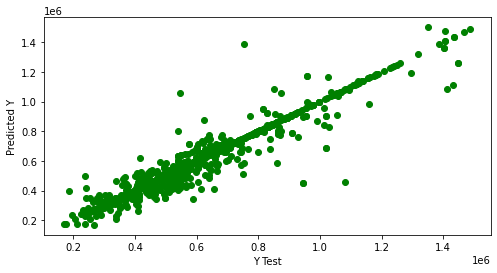

In [66]:
plt.figure(figsize=(8,4))
plt.scatter(y_test,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()


### SUPPORT VECTOR REGRESSOR

In [67]:
fun(svr)

TRAINING:- -5.235195119104086
Testing:- -5.791439547603261
MAE 178718.9196694675
MSE 59516452696.34132
RMSE 243959.9407614728
R2 Score -5.791439547603261


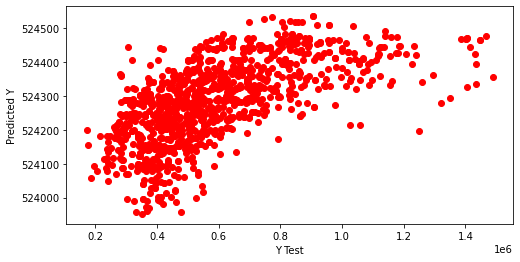

In [68]:
svr_pred = svr.predict(x_test)
svr_pred= svr_pred.reshape(-1,1)
plt.figure(figsize=(8,4))
plt.scatter(y_test,svr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

### KNN

In [69]:
fun(kn)

TRAINING:- 85.59647451934245
Testing:- 80.25860723269334
MAE 69285.9469901168
MSE 11106169590.088736
RMSE 105385.81303993786
R2 Score 80.25860723269334


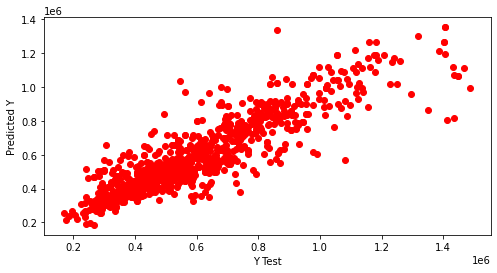

In [70]:
kn_pred = kn.predict(x_test)
plt.figure(figsize=(8,4))
plt.scatter(y_test,kn_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

### RANDOM FOREST REGRESSOR

In [71]:
from sklearn.ensemble import RandomForestRegressor
rd=RandomForestRegressor()
fun(rd)

TRAINING:- 98.92353827722972
Testing:- 93.19942506148993
MAE 34295.78230008985
MSE 3825887031.7539663
RMSE 61853.75519525041
R2 Score 93.19942506148993


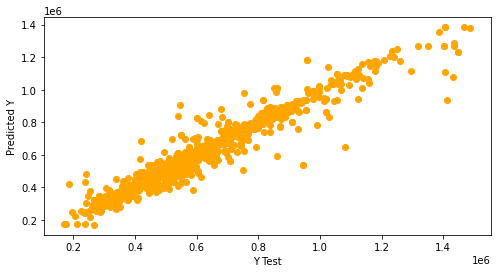

In [72]:
rd_pred= rd.predict(x_test)
rd_pred = rd_pred.reshape(-1,1)
plt.figure(figsize=(8,4))
plt.scatter(y_test,rd_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

### ADABOOST REGRESSOR

In [73]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
fun(ad)

TRAINING:- 40.004264013752575
Testing:- 41.60259497165298
MAE 150925.36098697747
MSE 32853380281.25397
RMSE 181255.01449961038
R2 Score 41.60259497165298


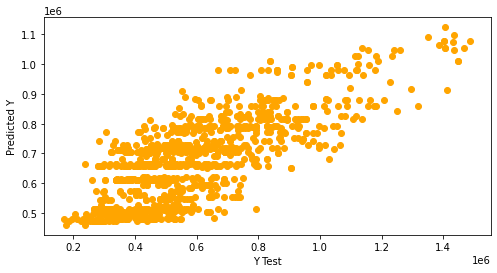

In [74]:
ad_pred= ad.predict(x_test)
ad_pred = ad_pred.reshape(-1,1)
plt.figure(figsize=(8,4))
plt.scatter(y_test,ad_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

### GRADIENTBOOST REGRESSOR

In [75]:
from sklearn.ensemble import GradientBoostingRegressor
gd=GradientBoostingRegressor()
fun(gd)

TRAINING:- 83.86161667777735
Testing:- 84.41122196216179
MAE 68023.1463118856
MSE 8769979637.769112
RMSE 93648.16943095638
R2 Score 84.41122196216179


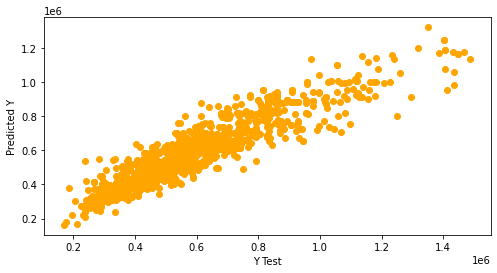

In [76]:
gd_pred= gd.predict(x_test)
gd_pred = gd_pred.reshape(-1,1)
plt.figure(figsize=(8,4))
plt.scatter(y_test,gd_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [79]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rd,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [80]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [81]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}  



In [82]:
randmf = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, min_samples_leaf= 1, max_features = 'auto', max_depth= 90, bootstrap=True) 
randmf.fit( x_train, y_train) 


RandomForestRegressor(max_depth=90)

In [83]:
fun(randmf)

TRAINING:- 98.91083950268373
Testing:- 93.09110485209085
MAE 34010.191761006296
MSE 3886826127.075168
RMSE 62344.415363969594
R2 Score 93.09110485209085


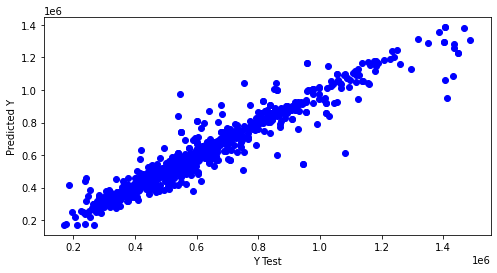

In [84]:
randmf_pred= randmf.predict(x_test)
randmf_pred = randmf_pred.reshape(-1,1)
plt.figure(figsize=(8,4))
plt.scatter(y_test,randmf_pred, c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [85]:
from sklearn.model_selection import cross_val_score

In [86]:
score=cross_val_score(svr,x_scaled,y,cv=5)
print("score of cross validation score for svr", score.mean()*100)
score=cross_val_score(dtr,x_scaled,y,cv=5)
print("score of cross validation score for dtr",score.mean()*100)
score=cross_val_score(rd,x_scaled,y,cv=5)
print("score of cross validation score for rd",score.mean()*100)
score=cross_val_score(gd,x_scaled,y,cv=5)
print("score of cross validation score for Gd",score.mean()*100)
score=cross_val_score(ad,x_scaled,y,cv=4)
print("score of cross validation score for ad",score.mean()*100)
score=cross_val_score(randmf,x_scaled,y,cv=4)
print('score of cross validation score for rd hyper',score.mean()*100)

score of cross validation score for svr -9.103397753887048
score of cross validation score for dtr 85.45532166240305
score of cross validation score for rd 91.09792133534376
score of cross validation score for Gd 79.43333921462049
score of cross validation score for ad 35.18922972134815
score of cross validation score for rd hyper 91.43142765547782


### MODEL SELECTION

1) We got 91% accuracy in Random forest and we increase it by 0.5% using hyper parameter tuning.

2) we have higher R2 score also in Random forest model so we will conclude it as our best fit model.

In [87]:
import pickle
filename='carpricepred.pkl'
pickle.dump(randmf,open(filename,'wb'))

       Actual    Predict
862    666999   679755.0
1713   626099   582685.0
193    462199   446220.0
4309  1119199  1116988.0
1527   464199   430178.0
...       ...        ...
4118   327399   333905.0
4787   563499   609378.0
4073   357899   373191.0
3624   829099   878874.0
4420   546599   538544.0

[1113 rows x 2 columns]


Text(0.5, 1.0, 'Regressor Line')

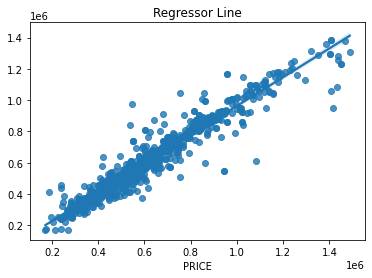

In [88]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=randmf_pred

res

print(res)
sns.regplot(y_test,randmf_pred)
plt.title('Regressor Line')

CONCLUSION:
    
    From above graph, we can visulise that we get best fit model and good price prediciton here.

# ------------------------------------------THANK YOU---------------------------------------------------